Video: https://www.youtube.com/watch?v=P0Xr5TIML8U

Documentación: https://docs.scipy.org/doc/scipy/reference/index.html

Scipy es el módulo perfecto para hacer cálculos científicos. Aquí veremos: optimización mediante scipy.optimize, interpolación, la transformada de Fourier para estudiar señales y un poco de análisis de imagen con NdImage

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Interpolar

Documentación: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d

Cuando estamos analizando datos suele pasar que en algunos casos encontremos registros vacíos donde encontremos datos null o nan. Cuando esto pasa necesitamos interpolar los datos, encontrar una manera de rellenar esos huecos para poder estudiar el conjunto.

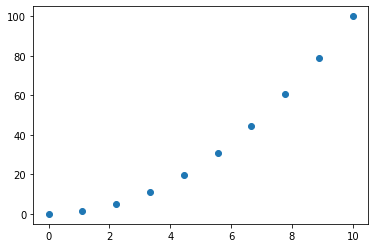

In [2]:
# imaginemos la representación de unos puntos en el espacio 

x = np.linspace(0,10,10)
y = x**2

plt.scatter(x,y)
plt.show()

Esta representación formada por puntos que siguen un partron y puede ser interpolada para encontrar el resto de puntos que siguen el patrón y que nos ayudaría a generar una expresión que llamaremos f 

In [3]:
# cargamos el módulo de interpolación de scipy
from scipy.interpolate import interp1d

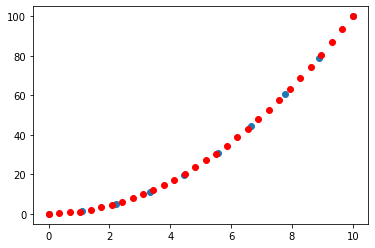

In [4]:
# la expresión f a la que vamos a aplicar la interpolación
f = interp1d(x,y, kind ='linear')

# vamos a tomar 30 valores del eje x entre 0y 10
new_x = np.linspace(0,10,30)
results = f(new_x)

# representamos los puntos
plt.scatter(x,y)

# representamos los puntos de la interpolación
plt.scatter(new_x, results, c='r')
plt.show()

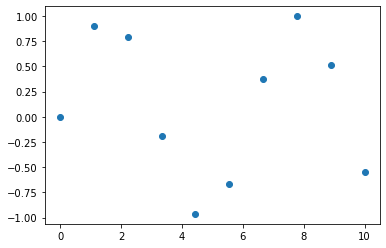

In [5]:
# imaginemos la representación de unos puntos en el espacio 

x = np.linspace(0,10,10)
y = np.sin(x)

plt.scatter(x,y)
plt.show()

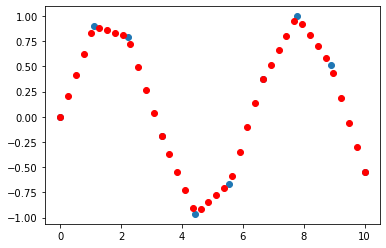

In [6]:
# la interpolación lineal no podrá hacer bien su trabajo
f = interp1d(x,y, kind ='linear')
new_x = np.linspace(0,10,40)
results = f(new_x)
plt.scatter(x,y)
plt.scatter(new_x, results, c='r')
plt.show()

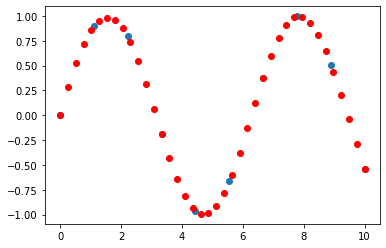

In [7]:
# en este caso hace falta cambiar el parámetro kind
f = interp1d(x,y, kind ='cubic')
new_x = np.linspace(0,10,40)
results = f(new_x)
plt.scatter(x,y)
plt.scatter(new_x, results, c='r')
plt.show()

## Optimizar
Normalmente cuando hablamos de optimizar hablamos de minimizar

Documentación: https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html

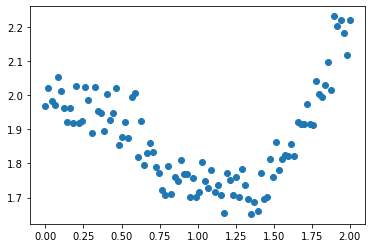

In [8]:
x = np.linspace(0,2,100)
y =1/3 * x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20

plt.scatter(x,y)
plt.show()

In [9]:
# definimos un polinomio de grado 3 
# buscaremos los parámetros que se ajusten a la nube de puntos
def f(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

In [10]:
# cargamos el módulo de optimización
from scipy import optimize

In [11]:
# Usamos el método curve.fi que usa el método de mínimos cuadrados 
optimize.curve_fit(f, x, y)

(array([ 0.35209819, -0.66839166,  0.06782881,  1.98971945]),
 array([[ 0.00106381, -0.00319144,  0.00254034, -0.00041272],
        [-0.00319144,  0.00985317, -0.00817874,  0.00142218],
        [ 0.00254034, -0.00817874,  0.0072575 , -0.00142944],
        [-0.00041272,  0.00142218, -0.00142944,  0.00038319]]))

En el primer array aparecen los valores de los parámetros a, b, c y d.
En el segundo aparecen las covarianzas

In [12]:
# guardamos estos valores en unas variables
params , param_cov = optimize.curve_fit(f, x, y)

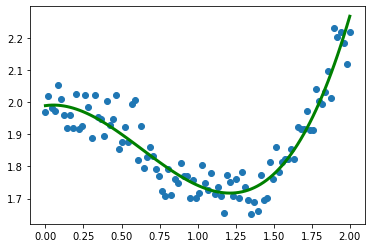

In [13]:
plt.scatter(x,y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c='g', lw=3)
plt.show()

Toda esta explicación de la optimización tiene un valor educativo, ya que mediante el módulo de sklear podemos resolver este problema de forma más rápida y con mucho menos código.

### Minimización
Un problema muy relacionado con el Descenso del Gradiente y que necesitamos comprender y controlar

In [14]:
# definimos una curva en el espacio

def f (x):
    return x**2 + 15*np.sin(x)

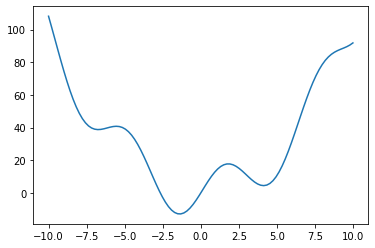

In [15]:
# los valores que toma x van de -10 a 10
x = np.linspace(-10,10,100)
plt.plot(x, f(x))
plt.show()

In [16]:
 # le pasamos al método minimizar la curva
optimize.minimize(f, x0=-5)

      fun: -12.82361688780436
 hess_inv: array([[0.05978674]])
      jac: array([3.57627869e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 9
   status: 0
  success: True
        x: array([-1.38505581])

Lo que nos interesa de toda esta información es el valor de x que aparece al final del todo.

In [17]:
# punto de partida
x0=-5
# optimización
result = optimize.minimize(f, x0=x0).x

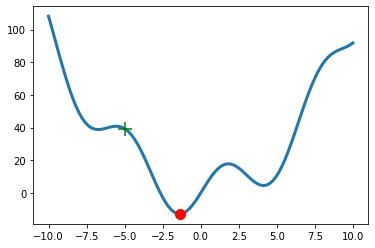

In [18]:
# representamos la curva
plt.plot(x, f(x), lw=3, zorder=-1)

# cargamos el punto buscado
plt.scatter(result, f(result), s=100, c='r', zorder=1)

# punto de partida
plt.scatter(x0, f(x0), s=200, marker='+', c='g', zorder=1)
plt.show()

In [19]:
# Veamos el ejemplo con una función de dos dimensiones
def f(x):
    return np.sin(x[0]) + np.cos(x[0]+x[1])*np.cos(x[0])


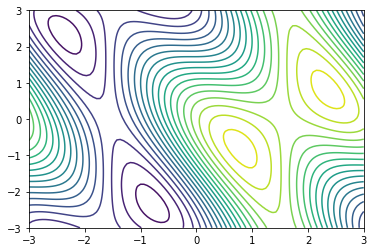

In [20]:
# definimos el espacio
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
x,y = np.meshgrid(x,y)

# creamos la función
z = f(np.array([x,y]))

plt.contour(x,y,z,20)
plt.show()

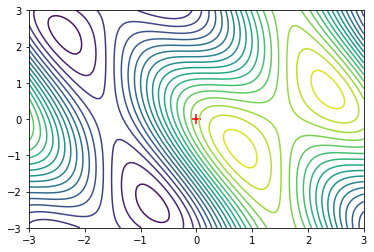

In [22]:
# inicializamos el punto inicial en 0,0
x0 = np.zeros((2,1))

#lo representamos en el espacio
plt.contour(x,y,z,20)
plt.scatter(x0[0], x0[1], marker='+', c='r', s=100)
plt.show()

[-0.78539915 -2.35619346]


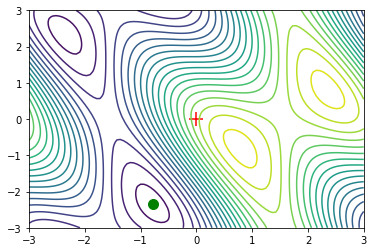

In [27]:
# realizamos la búsqueda del punto mínimo

result = optimize.minimize(f, x0=x0).x
print(result)
#lo representamos en el espacio
plt.scatter(result[0], result[1], c='g', s=100)


plt.contour(x,y,z,20)
plt.scatter(x0[0], x0[1], marker='+', c='r', s=200)
plt.show()

## Transformada de Fourier
Existe una librería muy interesante para estudiar el comportamiento de las frecuencias de una gráfica de una curva periódica. Con las transformaciones de Fouirer.

Documentación: https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html

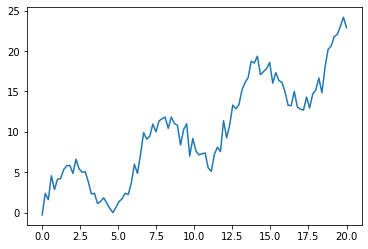

In [28]:
# imaginemos una curva sinoidal con una tendencia ascendente
x = np.linspace(0,20,100)
y = x + 4*np.sin(x) + np.random.randn(x.shape[0])
plt.plot(x,y)
plt.show()

In [29]:
# cargamos el módulo de señales
from scipy import signal

In [31]:
# usamos el método.detrend para eliminar la tendencia ascedente
new_y = signal.detrend(y)

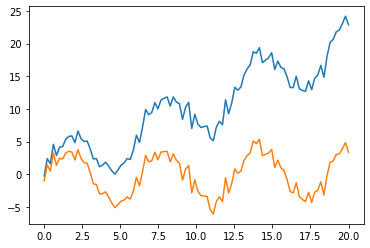

In [33]:
plt.plot(x,y)
plt.plot(x, new_y)
plt.show()

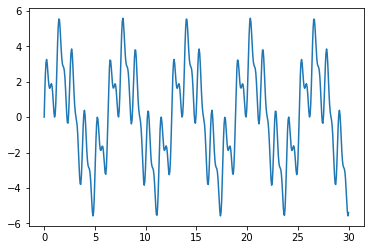

In [46]:
# estudiemos ahora las frecuencias de una señal 
x = np.linspace(0,30,500)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x)
plt.plot(x,y)
plt.show()

In [38]:
from scipy import fftpack

C:\Users\Adarax\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


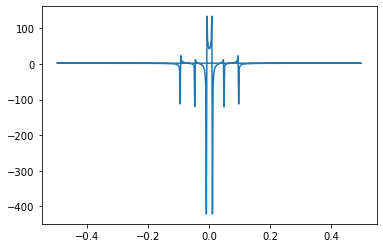

In [48]:
fourier = fftpack.fft(y)
frecuencias = fftpack.fftfreq(y.size)
plt.plot(frecuencias, fourier)
plt.show()

Con los datos obtenidos no tenemos realmente gran información, necesitamos los valores absolutos de este estudio

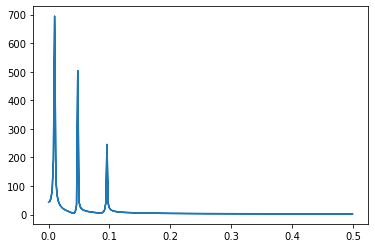

In [52]:
plt.plot(np.abs(frecuencias),np.abs(fourier))
plt.show()

Esta técnica a priori no parece muy interesante, pero con este estudio podemos limpiar una señal, eliminar el ruido y quedarnos con los valores interesantes de la señal

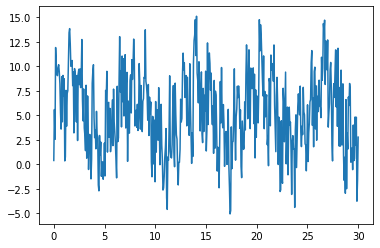

In [57]:
# imaginemos una señal muy sucia
x = np.linspace(0,30,500)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x,y)
plt.show()

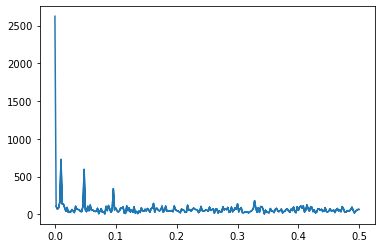

In [58]:
# aplicamos las transformaciones y extraemos las frecuencias

fourier = fftpack.fft(y)
frecuencias = fftpack.fftfreq(y.size)
power = np.abs(fourier)
plt.plot(np.abs(frecuencias),power)
plt.show()

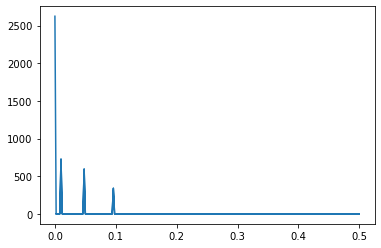

In [60]:
# eliminaremos los valores inferiores a cierto límite

fourier[power<200] = 0

# volvemos a dibujar
plt.plot(np.abs(frecuencias),np.abs(fourier))
plt.show()

In [61]:
# realizamos la inversa de la transformada de fourier
señal_filtrada = fftpack.ifft(fourier)

C:\Users\Adarax\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


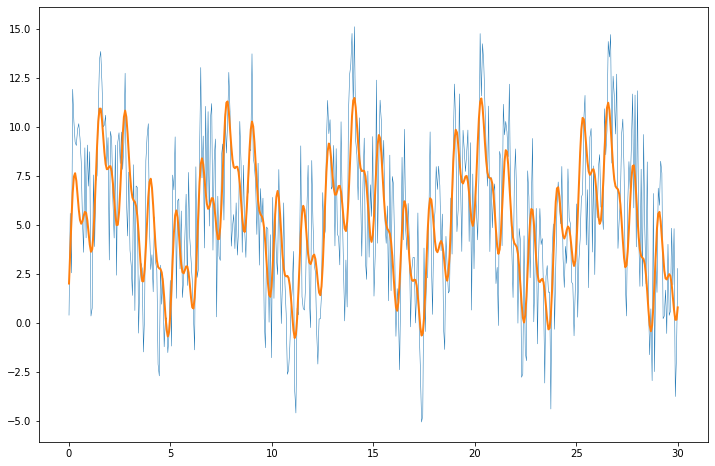

In [62]:
# representamos
plt.figure(figsize=(12,8))
# señal base
plt.plot(x,y, lw=0.5)
# señal limpiada
plt.plot(x, señal_filtrada, lw=2)
plt.show()

## NdImage
Análisis y tratamiento de imagen

Documentación: 

In [63]:
# cargamos el módulo ndimage
from scipy import ndimage

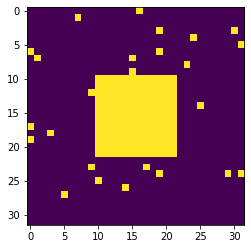

In [75]:
# imaginemos un espacio de 32x32
X = np.zeros((32,32))

# añadimos un espacio central de 10x10
X[10:-10, 10:-10] = 1

# colocamos algunos puntos 
np.random.seed(0)
X[np.random.randint(0,32,30), np.random.randint(0,32,30),] = 1
plt.imshow(X)
plt.show()

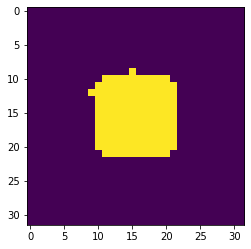

In [76]:
# limpiar de artefactos la imagen

open_x = ndimage.binary_opening(X)
plt.imshow(open_x)

### ejemplo práctico

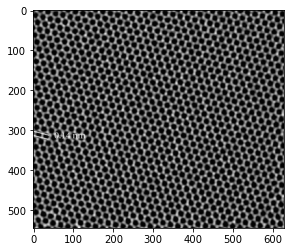

array([[ 17,   0,  14, ..., 103, 131, 154],
       [ 24,   8,  28, ...,  82, 109, 130],
       [ 30,  15,  33, ...,  72,  96, 117],
       ...,
       [  5,   1,   1, ..., 159, 180, 198],
       [ 11,   2,   1, ..., 150, 169, 186],
       [ 36,  28,  30, ...,  96, 116, 134]], dtype=uint8)

In [89]:
imagen = plt.imread('grafeno.jpg')
plt.imshow(imagen)
plt.show()

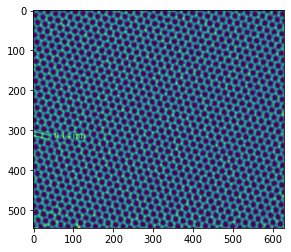

In [88]:
# eliminamos la tercera dimensión de la imagen que guarda el color
imagen = imagen[:,:,0]
plt.imshow(imagen)
plt.show()